#### Feature Learning

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [55]:
images = np.genfromtxt('Data/mnist_train.csv', delimiter=',')
images.shape

(6000, 785)

In [56]:
images_X, images_y = images[:, 1:], images[:, 0]

# Notice that the values are much larger than 0-1 but scikit-learn RBM version assumes 0-1 scaling
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

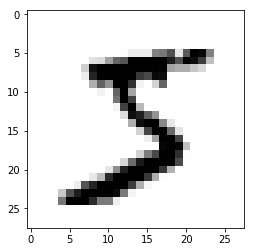

In [57]:
# See the image formed from first 28x28 pixels
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

# verify with the response
images_y[0]

In [58]:
# scale images_X to be between 0 and 1
images_X = images_X / 255

# make pixels binary (either white or black)
images_X = (images_X > 0.5).astype(float)

# Verify values
np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

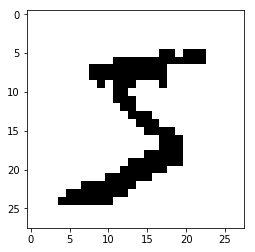

In [59]:
# Let us view the image at position 0, in black & white
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

# Verify with response
images_y[0]

ValueError: num must be 1 <= num <= 100, not 101

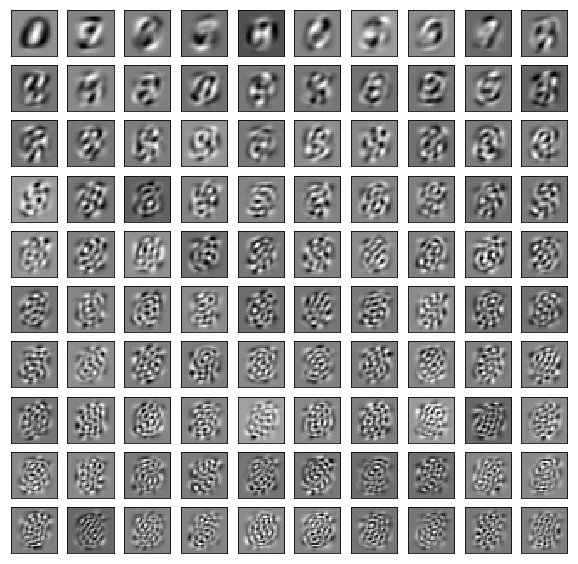

In [77]:
# import Principal Components Analysis module
from sklearn.decomposition import PCA
# extract 100 "eigen-digits"
pca = PCA(n_components=100)
pca.fit(images_X)
# graph the 100 components
plt.figure(figsize=(10, 10))
for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')
plt.show()

In [61]:
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 0.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 0.97s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 1.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -123.73, time = 1.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -117.15, time = 1.94s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -110.92, time = 1.71s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -115.42, time = 1.07s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -116.64, time = 1.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -113.00, time = 1.03s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -109.71, time = 0.97s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -108.15, time = 1.09s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -120.09, time = 1.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -106.45, time = 1.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -105.50, time = 0.97s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=20,
       random_state=0, verbose=True)

In [62]:
len(rbm.components_)

100

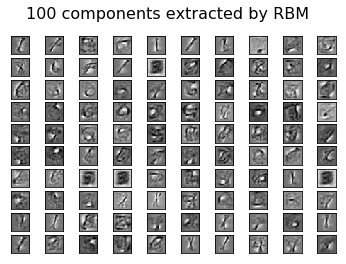

In [63]:
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.show()

In [64]:
# This code will check to see how many unique elements exist in rbm.components_.
# We notice that the components are unique

np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [65]:
# Use our Boltzman Machine to transform a single image of a 5
image_new_features = rbm.transform(images_X[:1]).reshape(100,)
image_new_features

array([5.04425729e-16, 2.02820144e-14, 1.33701260e-07, 1.47208480e-08,
       1.71171125e-19, 6.69458815e-14, 1.10828878e-10, 1.40939141e-12,
       4.61770947e-27, 1.20137231e-07, 9.91922258e-08, 5.09924260e-01,
       3.67802607e-24, 2.10037467e-14, 1.00000000e+00, 9.99999998e-01,
       2.42149869e-15, 1.03524802e-09, 9.25490369e-01, 3.33492841e-09,
       3.84405568e-11, 9.99996966e-01, 6.87867068e-18, 3.47906101e-04,
       2.63893395e-21, 1.24863487e-19, 3.49285882e-02, 6.74335228e-01,
       9.99999999e-01, 9.99999751e-01, 3.04830812e-08, 8.25559656e-07,
       1.37264086e-08, 1.38368003e-08, 1.00000000e+00, 8.69847435e-25,
       3.00438587e-10, 1.10799846e-09, 2.20301948e-08, 1.28626383e-16,
       4.69752343e-17, 6.76503677e-03, 3.80874414e-15, 1.64499539e-04,
       1.65520152e-07, 7.65297993e-11, 9.34801952e-10, 5.12150571e-18,
       1.06433310e-01, 1.00000000e+00, 5.03297320e-21, 5.15645034e-21,
       3.93803215e-16, 1.28245204e-11, 2.86264614e-17, 1.42939203e-10,
      

In [66]:
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[ -4.97522006,  -8.57942677,  -3.50812659,   8.9490758 ,
        -10.22303182,  -5.87497655,  -0.10503224, -27.55102119,
        -33.9440507 ,  -7.08970595,   3.19622792,  26.71505889,
        -24.67609616,  -6.22884827,  10.34111802,  30.20216422,
         -3.77841942,  -1.88889474,  16.60572121,  -1.17791644,
         -8.38619917,  26.92095543, -25.21652247,   8.29031965,
        -12.5212161 ,  -7.28446259,   7.7958551 ,  22.25297201,
         31.92689416,   8.46654856,  -4.94339578,  -5.48515199,
        -13.98151658,   2.44645103,  38.24920812, -22.91879832,
         -7.91651846,  16.94632894,  -8.96652426, -47.59871689,
        -22.77016752,  19.09080267, -10.81904945,  -2.67783528,
         -4.17990258, -10.94193686,  -3.79409661, -25.72094838,
         -2.97506389,  32.634621  , -25.49839945, -18.39064661,
         -4.22509035,  -8.03920106, -11.91759167,   1.49718342,
         11.50093086, -11.48351304,   1.13436652,   0.51546034,
        -13.16898961,  -1.30393172,   9.

In [67]:
# Note that the top 8 features viz., 69 14 62 63 34 49 28 15 achieve 100%
top_features = image_new_features.argsort()[-20:][::-1]
print ("Top Features: ", top_features)

print (image_new_features[top_features])

Top Features:  [69 14 62 63 34 49 28 15 83 92 29 21 82 18 27 56 11 94 58 48]
[1.         1.         1.         1.         1.         1.
 1.         1.         0.9999999  0.99999986 0.99999975 0.99999697
 0.99975933 0.92549037 0.67433523 0.61422699 0.50992426 0.32660746
 0.12930579 0.10643331]


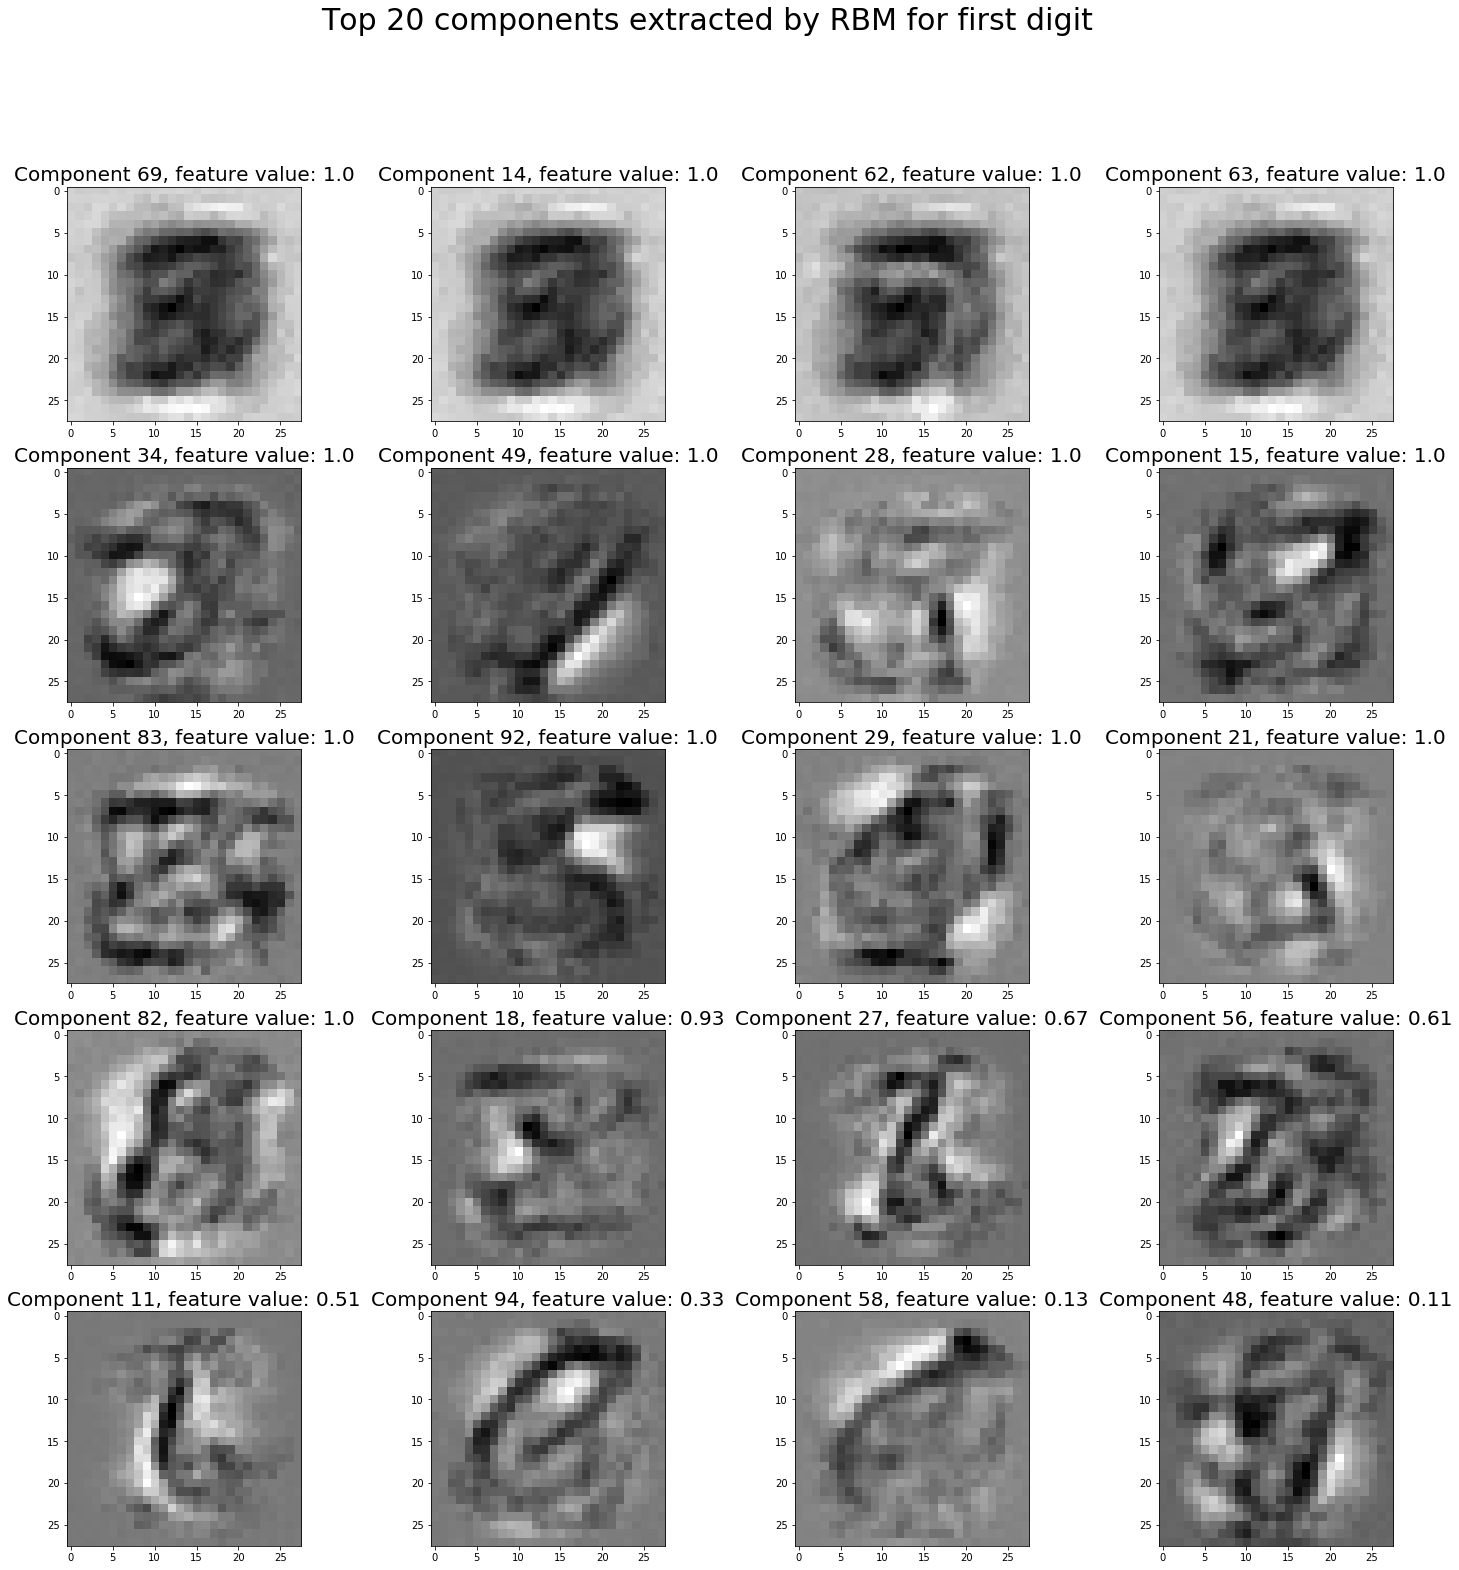

In [72]:
# plot the RBM components (representations of the new feature sets) for the most represented features
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

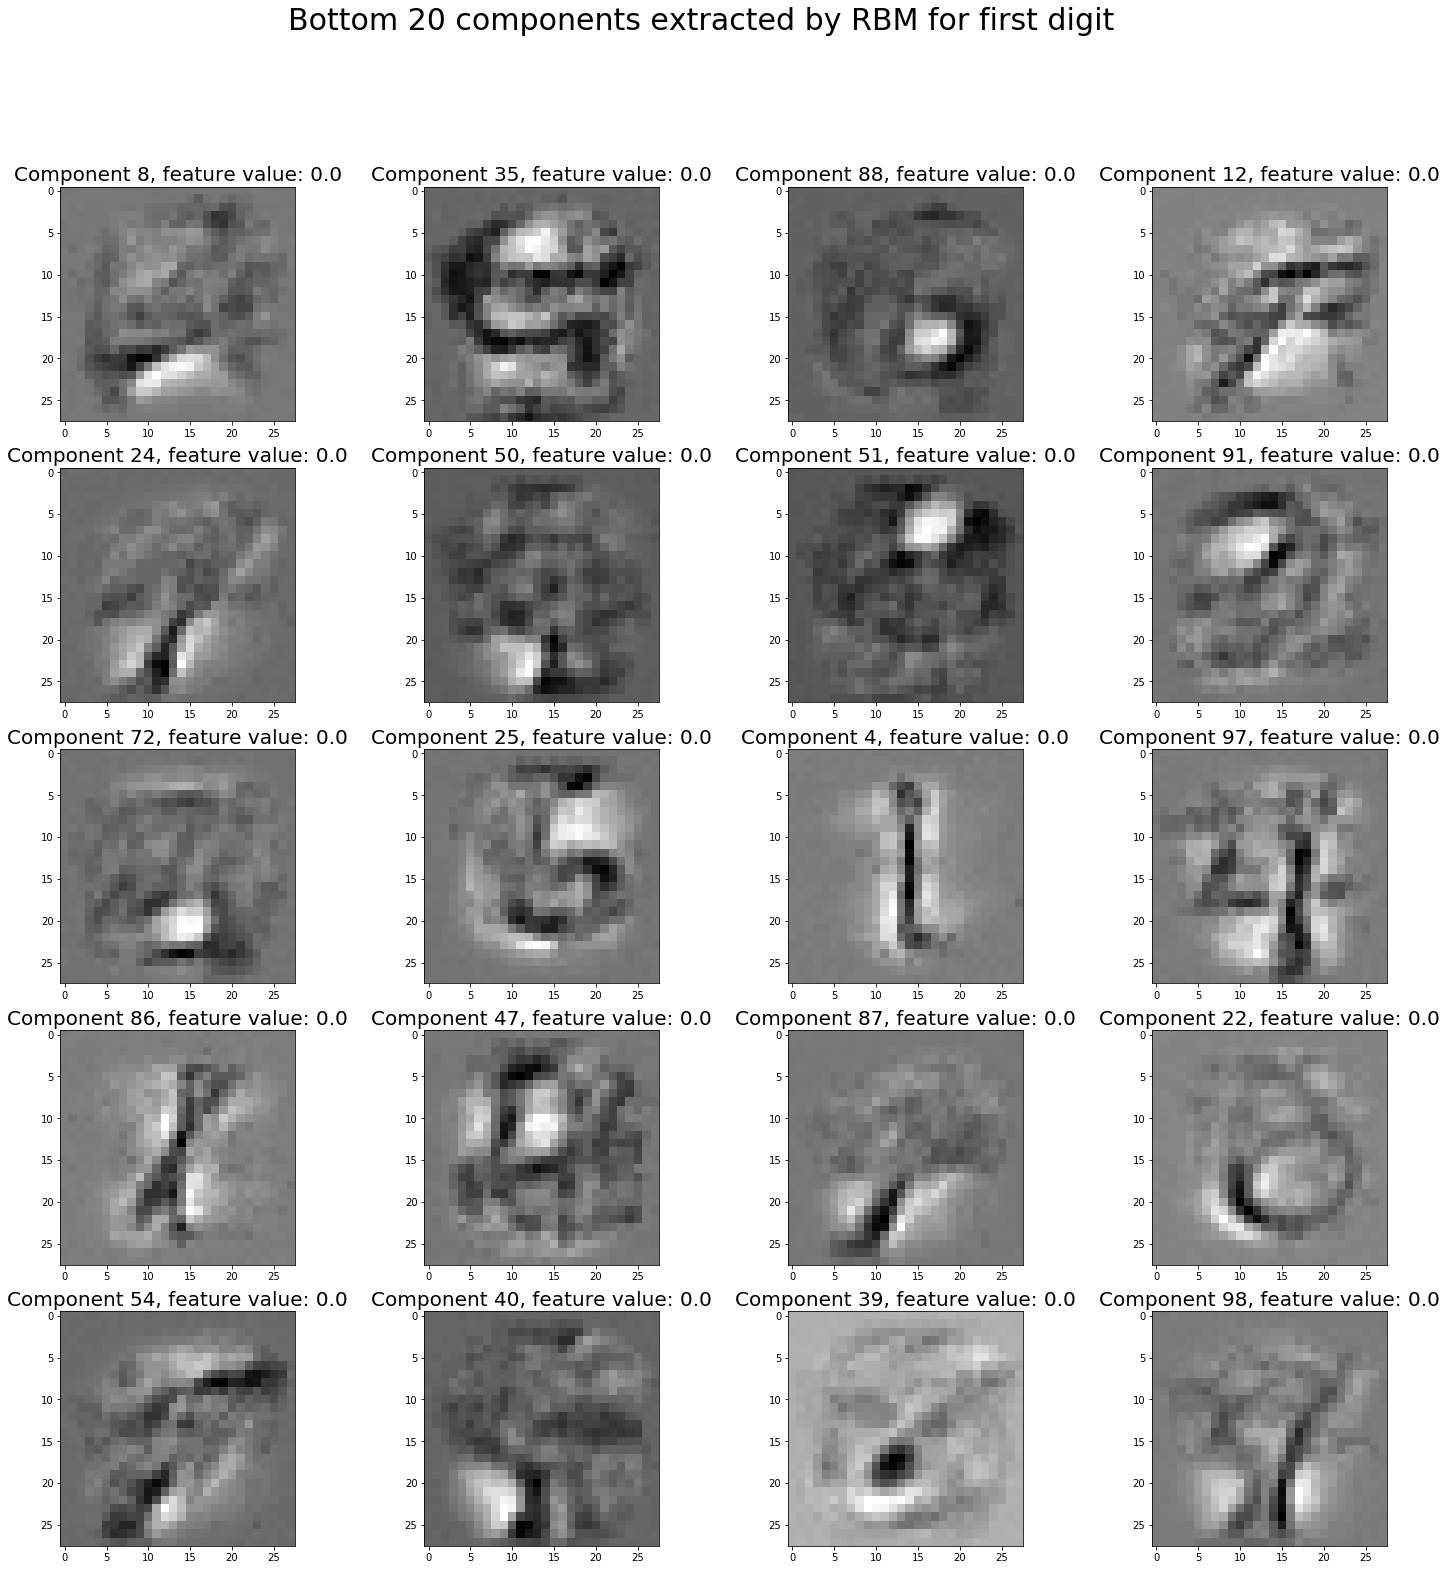

In [73]:
# grab the least represented features
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25, 25))
for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

In [74]:
# import logistic regression and gridsearch module for some machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create our logistic regression
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# instantiate a gridsearh class
grid = GridSearchCV(lr, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logist

({'C': 0.1}, 0.8908333333333334)

In [75]:
# Use PCA to extract new features

lr = LogisticRegression()
pca = PCA()

params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components': [10, 100, 200]}

# create our pipeline
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logist

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default so

({'clf__C': 1.0, 'pca__n_components': 100}, 0.8866666666666667)

In [78]:
# Use the RBM to learn new features

rbm = BernoulliRBM(random_state=0)

params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components': [100, 200]
         }

# create our pipeline
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logist

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


({'clf__C': 1.0, 'rbm__n_components': 200}, 0.9146666666666666)